# Problem statement

Based on the given financial data create a ML model to predict if the client is high risk or low risk if we were to provide them loan. We need to predict the column Risk_Flag and it contains value 1 if the client is high risk else it will be 0.


# importing Libraries

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Reading

In [101]:
df=pd.read_json(r"C:\Users\Admin\Machine learning Projects\loan_approval_dataset.json")

In [102]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [103]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Data cleaning

In [104]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
251995    False
251996    False
251997    False
251998    False
251999    False
Length: 252000, dtype: bool

In [105]:
df.shape

(252000, 13)

In [106]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [108]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [109]:
df.describe(include=['object'])

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


In [110]:
df['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [111]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [112]:
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

# Data Analysis

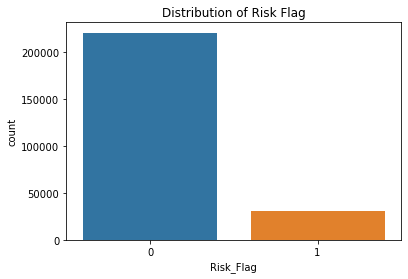

In [113]:
# Visualize the distribution of Risk_Flag
sns.countplot(x='Risk_Flag', data=df)
plt.title('Distribution of Risk Flag')
plt.show()


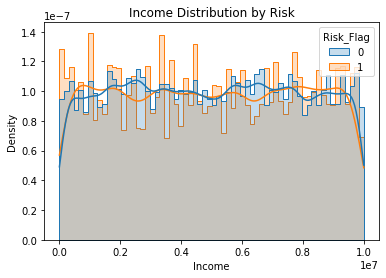

In [114]:
# Visualize distribution of Income
sns.histplot(data=df, x='Income', hue='Risk_Flag', kde=True, element='step', stat='density', common_norm=False)
plt.title('Income Distribution by Risk')
plt.show()

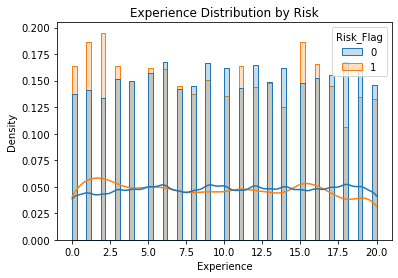

In [115]:
# Visualize distribution of Experience
sns.histplot(data=df, x='Experience', hue='Risk_Flag', kde=True, element='step', stat='density', common_norm=False)
plt.title('Experience Distribution by Risk')
plt.show()

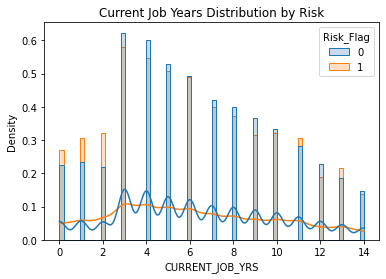

In [116]:
# Visualize distribution of Current Job Years
sns.histplot(data=df, x='CURRENT_JOB_YRS', hue='Risk_Flag', kde=True, element='step', stat='density', common_norm=False)
plt.title('Current Job Years Distribution by Risk')
plt.show()


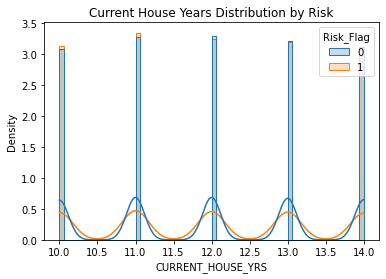

In [117]:
# Visualize distribution of Current House Years
sns.histplot(data=df, x='CURRENT_HOUSE_YRS', hue='Risk_Flag', kde=True, element='step', stat='density', common_norm=False)
plt.title('Current House Years Distribution by Risk')
plt.show()


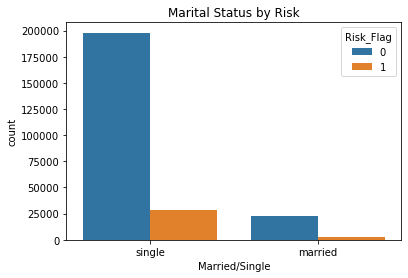

In [118]:
# Bar plot for categorical variables
# Married/Single
sns.countplot(data=df, x='Married/Single', hue='Risk_Flag')
plt.title('Marital Status by Risk')
plt.show()

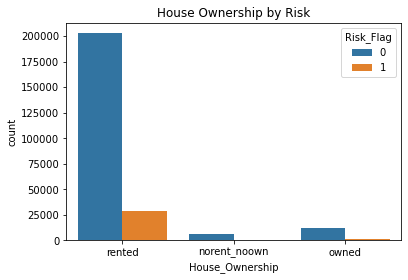

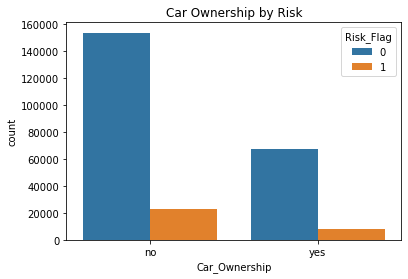

In [119]:
# House Ownership
sns.countplot(data=df, x='House_Ownership', hue='Risk_Flag')
plt.title('House Ownership by Risk')
plt.show()

# Car Ownership
sns.countplot(data=df, x='Car_Ownership', hue='Risk_Flag')
plt.title('Car Ownership by Risk')
plt.show()


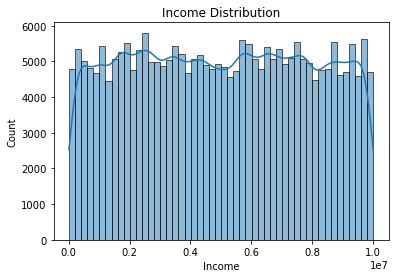

In [120]:
# Visualize the distribution of Income
sns.histplot(df['Income'], bins=50, kde=True)
plt.title('Income Distribution')
plt.show()

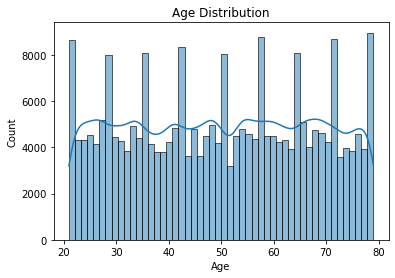

In [121]:
# Visualize the distribution of Age
sns.histplot(df['Age'], bins=50, kde=True)
plt.title('Age Distribution')
plt.show()

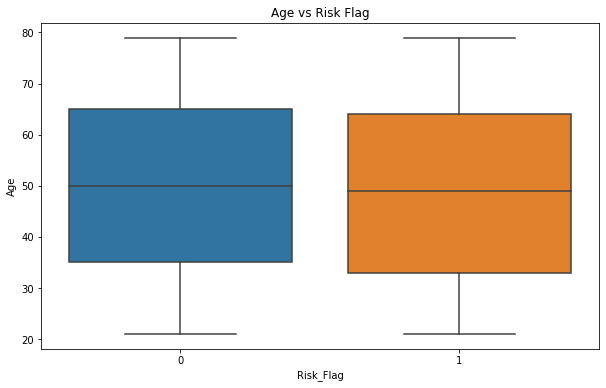

In [122]:
# Explore relationships
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk_Flag', y='Age', data=df)
plt.title('Age vs Risk Flag')
plt.show()

# Data Processing

In [78]:
# divide the dataset into train and test.
# target: Risk_Flag(output)

from sklearn.model_selection import train_test_split

In [79]:
# train_test_split => shuffles the data first, then it will split the data into train and test

x_train,x_test,y_train,y_test=train_test_split(df.drop('Risk_Flag',axis=1),df['Risk_Flag'],test_size=0.2,random_state=42)

In [80]:
x_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
200471,200472,9121364,70,18,single,rented,no,Artist,Sikar,Rajasthan,3,11
92611,92612,2636544,39,0,single,rented,no,Computer_hardware_engineer,Vellore,Tamil_Nadu,0,11
86397,86398,1010539,39,9,single,rented,no,Secretary,Hyderabad,Telangana,4,13
110500,110501,3897430,21,2,single,rented,no,Technician,Tinsukia,Assam,2,12
185133,185134,9470213,41,5,single,norent_noown,yes,Web_designer,Bidar,Karnataka,5,13


In [20]:

from sklearn.preprocessing import OneHotEncoder

# for train the train Data

In [21]:
# filtering all categorical type data
x_train_cat=x_train.select_dtypes('object')

# filtering all numerical data type
x_train_num=x_train.select_dtypes(['int64'])

In [22]:
oe=OneHotEncoder(drop='first',sparse=False)

oe.fit(x_train_cat) ## fit is learn from the data
oe.fit_transform(x_train_cat)## fit_transform convert the data,  (apply the learning from the data)

pd.DataFrame(oe.fit_transform(x_train_cat))#create dataframe

,0,1,2,3,4,5,6,7,8,9,...,388,389,390,391,392,393,394,395,396,397
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201595,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201596,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201597,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201598,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
pd.DataFrame(oe.fit_transform(x_train_cat),index=x_train_cat.index)

,0,1,2,3,4,5,6,7,8,9,...,388,389,390,391,392,393,394,395,396,397
200471,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92611,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
86397,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
110500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185133,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103694,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131932,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146867,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
oe.get_feature_names_out(x_train_cat.columns)

array(['Married/Single_single', 'House_Ownership_owned',
       'House_Ownership_rented', 'Car_Ownership_yes',
       'Profession_Analyst', 'Profession_Architect',
       'Profession_Army_officer', 'Profession_Artist',
       'Profession_Aviator', 'Profession_Biomedical_Engineer',
       'Profession_Chartered_Accountant', 'Profession_Chef',
       'Profession_Chemical_engineer', 'Profession_Civil_engineer',
       'Profession_Civil_servant', 'Profession_Comedian',
       'Profession_Computer_hardware_engineer',
       'Profession_Computer_operator', 'Profession_Consultant',
       'Profession_Dentist', 'Profession_Design_Engineer',
       'Profession_Designer', 'Profession_Drafter',
       'Profession_Economist', 'Profession_Engineer',
       'Profession_Fashion_Designer', 'Profession_Financial_Analyst',
       'Profession_Firefighter', 'Profession_Flight_attendant',
       'Profession_Geologist', 'Profession_Graphic_Designer',
       'Profession_Hotel_Manager', 'Profession_Industrial_

In [25]:
pd.DataFrame(oe.get_feature_names_out(x_train_cat.columns))

,0
0,Married/Single_single
1,House_Ownership_owned
2,House_Ownership_rented
3,Car_Ownership_yes
4,Profession_Analyst
...,...
393,STATE_Tripura
394,STATE_Uttar_Pradesh
395,STATE_Uttar_Pradesh[5]
396,STATE_Uttarakhand


In [26]:
# it will remove column names,and index also removed

x_train_cat_oe=pd.DataFrame(oe.fit_transform(x_train_cat),index=x_train_cat.index,\
                         columns=oe.get_feature_names_out(x_train_cat.columns))

# use for modelling

In [27]:
x_train_cat_oe

,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
200471,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92611,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
86397,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
110500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185133,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103694,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131932,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146867,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
#Standardization
from sklearn.preprocessing import StandardScaler


In [29]:
sc=StandardScaler()
sc.fit(x_train_num)
sc.fit_transform(x_train_num)

array([[ 1.02478704,  1.43042208,  1.1704357 ,  1.31875899, -0.91408412,
        -0.71256888],
       [-0.45771734, -0.82070103, -0.64492241, -1.68084024, -1.73683695,
        -0.71256888],
       [-0.54312697, -1.38514807, -0.64492241, -0.18104063, -0.63983317,
         0.71724272],
       ...,
       [ 0.08273838,  1.39312773, -1.46476155, -0.84761823, -0.36558222,
        -1.42747467],
       [ 0.28801562,  0.57619799, -0.58636247, -1.34755144, -1.18833506,
         1.43214851],
       [-0.05435135, -0.69974311,  1.1704357 , -0.51432943,  0.18291967,
         0.71724272]])

In [30]:
pd.DataFrame(sc.fit_transform(x_train_num))

,0,1,2,3,4,5
0,1.024787,1.430422,1.170436,1.318759,-0.914084,-0.712569
1,-0.457717,-0.820701,-0.644922,-1.680840,-1.736837,-0.712569
2,-0.543127,-1.385148,-0.644922,-0.181041,-0.639833,0.717243
3,-0.211838,-0.383000,-1.699001,-1.347551,-1.188335,0.002337
4,0.813971,1.551521,-0.527803,-0.847618,-0.365582,0.717243
...,...,...,...,...,...,...
201595,-0.082927,-0.917474,0.526276,-1.514196,-1.462586,0.002337
201596,-0.305385,1.497640,0.057797,1.652048,0.182920,-1.427475
201597,0.082738,1.393128,-1.464762,-0.847618,-0.365582,-1.427475
201598,0.288016,0.576198,-0.586362,-1.347551,-1.188335,1.432149


In [31]:
pd.DataFrame(sc.fit_transform(x_train_num),index=x_train_num.index)

,0,1,2,3,4,5
200471,1.024787,1.430422,1.170436,1.318759,-0.914084,-0.712569
92611,-0.457717,-0.820701,-0.644922,-1.680840,-1.736837,-0.712569
86397,-0.543127,-1.385148,-0.644922,-0.181041,-0.639833,0.717243
110500,-0.211838,-0.383000,-1.699001,-1.347551,-1.188335,0.002337
185133,0.813971,1.551521,-0.527803,-0.847618,-0.365582,0.717243
...,...,...,...,...,...,...
119879,-0.082927,-0.917474,0.526276,-1.514196,-1.462586,0.002337
103694,-0.305385,1.497640,0.057797,1.652048,0.182920,-1.427475
131932,0.082738,1.393128,-1.464762,-0.847618,-0.365582,-1.427475
146867,0.288016,0.576198,-0.586362,-1.347551,-1.188335,1.432149


In [32]:
x_train_num_sc=pd.DataFrame(sc.fit_transform(x_train_num),index=x_train_num.index, columns=x_train_num.columns)
x_train_num_sc

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
200471,1.024787,1.430422,1.170436,1.318759,-0.914084,-0.712569
92611,-0.457717,-0.820701,-0.644922,-1.680840,-1.736837,-0.712569
86397,-0.543127,-1.385148,-0.644922,-0.181041,-0.639833,0.717243
110500,-0.211838,-0.383000,-1.699001,-1.347551,-1.188335,0.002337
185133,0.813971,1.551521,-0.527803,-0.847618,-0.365582,0.717243
...,...,...,...,...,...,...
119879,-0.082927,-0.917474,0.526276,-1.514196,-1.462586,0.002337
103694,-0.305385,1.497640,0.057797,1.652048,0.182920,-1.427475
131932,0.082738,1.393128,-1.464762,-0.847618,-0.365582,-1.427475
146867,0.288016,0.576198,-0.586362,-1.347551,-1.188335,1.432149


In [33]:
## x_train_cat_oe(this is an categorical name)
## x_train_num_sc(this is an numerical name)

In [34]:
x_train_processed=x_train_num_sc.merge(x_train_cat_oe, left_index=True, right_index=True)

In [35]:
x_train_processed

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
200471,1.024787,1.430422,1.170436,1.318759,-0.914084,-0.712569,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92611,-0.457717,-0.820701,-0.644922,-1.680840,-1.736837,-0.712569,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
86397,-0.543127,-1.385148,-0.644922,-0.181041,-0.639833,0.717243,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
110500,-0.211838,-0.383000,-1.699001,-1.347551,-1.188335,0.002337,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185133,0.813971,1.551521,-0.527803,-0.847618,-0.365582,0.717243,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.082927,-0.917474,0.526276,-1.514196,-1.462586,0.002337,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103694,-0.305385,1.497640,0.057797,1.652048,0.182920,-1.427475,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131932,0.082738,1.393128,-1.464762,-0.847618,-0.365582,-1.427475,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146867,0.288016,0.576198,-0.586362,-1.347551,-1.188335,1.432149,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# for test the test data

In [36]:
x_test_cat=x_test.select_dtypes(['object'])
x_test_num=x_test.select_dtypes(['int'])

In [37]:
x_test_cat

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
75255,single,rented,no,Politician,Hindupur,Andhra_Pradesh
192435,single,rented,no,Computer_hardware_engineer,Narasaraopet,Andhra_Pradesh
154839,single,rented,no,Software_Developer,Patna,Bihar
59774,single,rented,no,Comedian,Haldia,West_Bengal
63788,single,rented,no,Web_designer,Coimbatore,Tamil_Nadu
...,...,...,...,...,...,...
181160,single,rented,no,Economist,Thrissur,Kerala
79701,single,rented,no,Mechanical_engineer,Gorakhpur,Uttar_Pradesh
77841,single,rented,no,Geologist,Kakinada,Andhra_Pradesh
35426,single,rented,yes,Lawyer,Malda,West_Bengal


In [38]:
x_test_num

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
75255,75256,4260981,47,18,7,13
192435,192436,8529345,44,2,2,10
154839,154840,7848654,55,9,9,13
59774,59775,8491491,61,20,8,11
63788,63789,1537266,78,13,9,12
...,...,...,...,...,...,...
181160,181161,6247448,43,7,6,11
79701,79702,1381568,50,7,4,10
77841,77842,8435439,68,1,1,14
35426,35427,569103,35,20,3,14


In [39]:
pd.DataFrame(oe.transform(x_test_cat), index=x_test_cat.index,columns=oe.get_feature_names_out(x_test_cat.columns))

,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
75255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192435,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154839,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59774,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
63788,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181160,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79701,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
77841,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35426,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
x_test_cat_oe=pd.DataFrame(oe.transform(x_test_cat), index=x_test_cat.index,columns=oe.get_feature_names_out(x_test_cat.columns))

In [41]:
x_test_cat_oe

,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
75255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192435,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154839,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59774,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
63788,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181160,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79701,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
77841,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35426,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
pd.DataFrame(sc.transform(x_test_num), index=x_test_num.index, columns=x_test_num.columns)

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
75255,-0.696271,-0.256798,-0.176443,1.318759,0.182920,0.717243
192435,0.914335,1.224910,-0.352123,-1.347551,-1.188335,-1.427475
154839,0.397588,0.988617,0.292037,-0.181041,0.731422,0.717243
59774,-0.909052,1.211770,0.643396,1.652048,0.457171,-0.712569
63788,-0.853881,-1.202301,1.638915,0.485537,0.731422,0.002337
...,...,...,...,...,...,...
181160,0.759363,0.432779,-0.410683,-0.514329,-0.091331,-0.712569
79701,-0.635162,-1.256350,-0.000763,-0.514329,-0.639833,-1.427475
77841,-0.660727,1.192312,1.053316,-1.514196,-1.462586,1.432149
35426,-1.243709,-1.538387,-0.879162,1.652048,-0.914084,1.432149


In [43]:
x_test_num_sc=pd.DataFrame(sc.transform(x_test_num), index=x_test_num.index, columns=x_test_num.columns)

In [44]:
x_test_num_sc

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
75255,-0.696271,-0.256798,-0.176443,1.318759,0.182920,0.717243
192435,0.914335,1.224910,-0.352123,-1.347551,-1.188335,-1.427475
154839,0.397588,0.988617,0.292037,-0.181041,0.731422,0.717243
59774,-0.909052,1.211770,0.643396,1.652048,0.457171,-0.712569
63788,-0.853881,-1.202301,1.638915,0.485537,0.731422,0.002337
...,...,...,...,...,...,...
181160,0.759363,0.432779,-0.410683,-0.514329,-0.091331,-0.712569
79701,-0.635162,-1.256350,-0.000763,-0.514329,-0.639833,-1.427475
77841,-0.660727,1.192312,1.053316,-1.514196,-1.462586,1.432149
35426,-1.243709,-1.538387,-0.879162,1.652048,-0.914084,1.432149


In [45]:
#x_test_cat_oe,#x_test_num_sc

In [46]:
x_test_processed=x_test_num_sc.merge(x_test_cat_oe, left_index=True, right_index=True)

In [47]:
x_test_processed

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
75255,-0.696271,-0.256798,-0.176443,1.318759,0.182920,0.717243,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192435,0.914335,1.224910,-0.352123,-1.347551,-1.188335,-1.427475,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154839,0.397588,0.988617,0.292037,-0.181041,0.731422,0.717243,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59774,-0.909052,1.211770,0.643396,1.652048,0.457171,-0.712569,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
63788,-0.853881,-1.202301,1.638915,0.485537,0.731422,0.002337,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181160,0.759363,0.432779,-0.410683,-0.514329,-0.091331,-0.712569,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79701,-0.635162,-1.256350,-0.000763,-0.514329,-0.639833,-1.427475,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
77841,-0.660727,1.192312,1.053316,-1.514196,-1.462586,1.432149,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35426,-1.243709,-1.538387,-0.879162,1.652048,-0.914084,1.432149,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# model building

# Train a model & Evalute a model¶

In [48]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [49]:
dt=DecisionTreeClassifier()
dt.fit(x_train_processed,y_train)
y_pred=dt.predict(x_test_processed)

print('accuracy_score',accuracy_score(y_test,y_pred))


accuracy_score 0.877281746031746


In [50]:
from sklearn.linear_model import LogisticRegression 
lg=LogisticRegression()
lg.fit(x_train_processed,y_train)
y_pred=lg.predict(x_test_processed)

print('accuracy_score',accuracy_score(y_test,y_pred))


accuracy_score 0.8759325396825397


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.ensemble import  RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_processed,y_train)
y_pred=rf.predict(x_test_processed)

print('accuracy_score',accuracy_score(y_test,y_pred))


accuracy_score 0.9019642857142857


In [54]:
data={
    'algorithmns':['DecisionTreeClassifier','LogisticRegression','RandomForestClassifier'],
    'accuracy_score':[0.877281746031746,0.8759325396825397,0.9019642857142857]
}

In [55]:
pd.DataFrame(data)

,algorithmns,accuracy_score
0,DecisionTreeClassifier,0.877282
1,LogisticRegression,0.875933
2,RandomForestClassifier,0.901964


# By looking at Accuracy_Score metric
1. RandomForest algorithm performing well for loan approval preduction on data
2. They showing high accuracy score compare to remaining algorithms

# conclusion

The goal of this project was to develop machine learning models to predict if a loan applicant is high risk or low risk. We used a dataset containing various client information, performed data preprocessing and exploration, and built models using decision tree, Logistic Regression and Random Forest. The Random Forest model provided better accuracy and feature importance insights. The findings can help in making informed decisions for loan approvals.

#Summary of Main Factors
1. Income: Higher income is associated with lower risk.
2. Age: Middle-aged clients tend to have lower risk.
3. Experience: More years of experience generally indicate lower risk.
4. Current Job Years: Longer job tenure is linked to lower risk.
5. Current House Years: Stability in housing is associated with lower risk.
6. Marital Status: Married clients often pose lower risk.
7. House Ownership: Owning a house indicates lower risk.
8. Car Ownership: Owning a car suggests lower risk.

#Main Deciding Factors Associated with Risk

Income: Higher income levels generally correlate with lower risk, as clients with higher incomes are better positioned to repay loans.

Age: Age can be an indicator of financial stability, with middle-aged clients typically posing lower risk compared to very young or older clients.

Experience: More years of work experience can imply greater job stability, reducing the risk associated with loan repayment.

Current Job Years: A longer tenure in the current job suggests job stability and consistent income, lowering the risk.

Current House Years: Stability in housing situation, indicated by more years in the current house, can reduce the risk as it implies financial stability.

Marital Status: Married clients might be perceived as more financially stable compared to single clients.

House Ownership: Owning a house can be seen as a sign of financial stability, reducing the risk of default.

Car Ownership: Owning a car might indicate financial stability and responsibility, slightly reducing the risk.